# **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder

# **Loading Training & Testing Dataset**

In [ ]:
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

# **Exploratory Data Analysis**

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df_num = train_df[["Age","SibSp","Parch","Fare"]]
df_cat = train_df[["Survived","Pclass","Cabin","Ticket","Embarked"]]

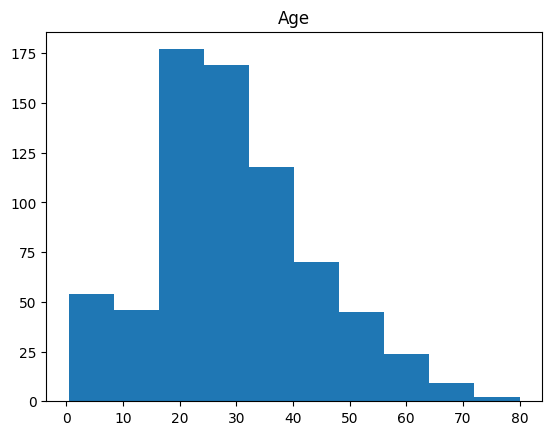

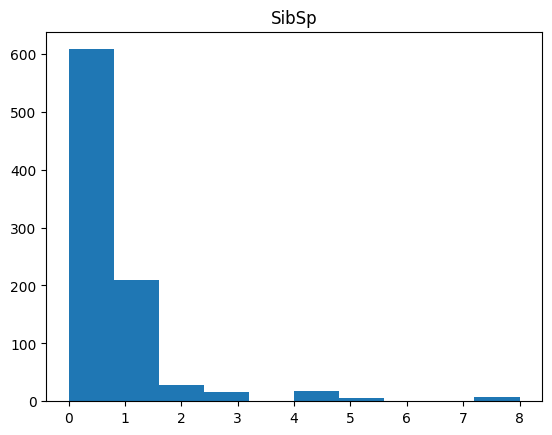

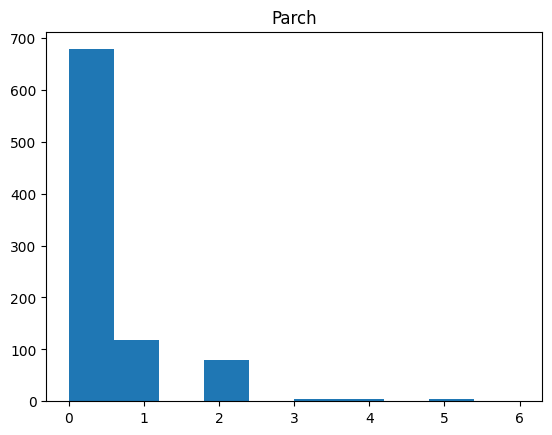

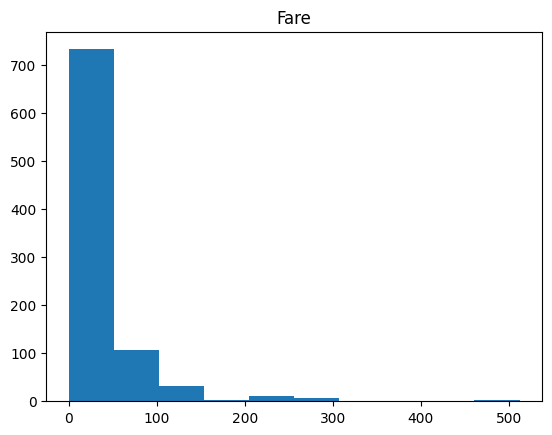

In [ ]:
for i in df_num.columns:
  plt.hist(df_num[i])
  plt.title(i)
  plt.show()

<Axes: xlabel='Pclass', ylabel='Fare'>

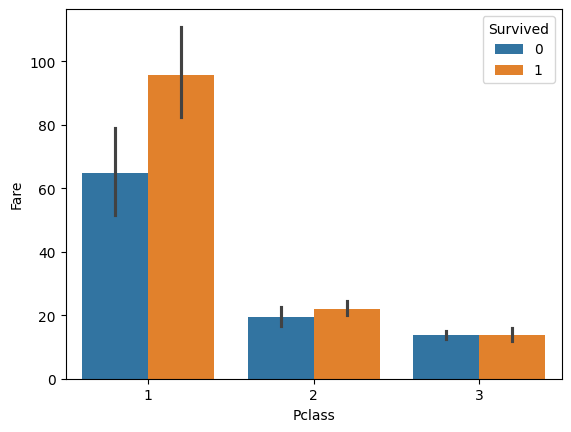

In [ ]:
sns.barplot(data = train_df, x= "Pclass", y= "Fare", hue = "Survived")

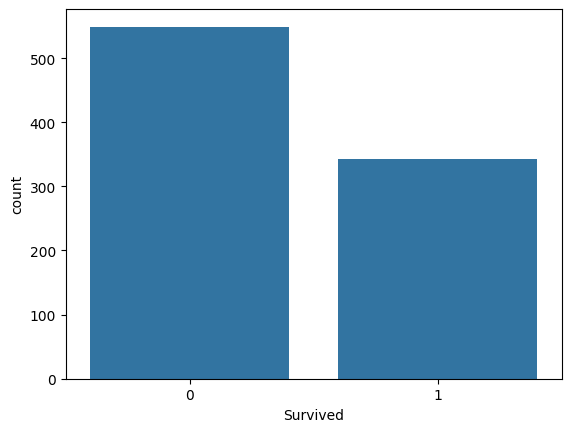

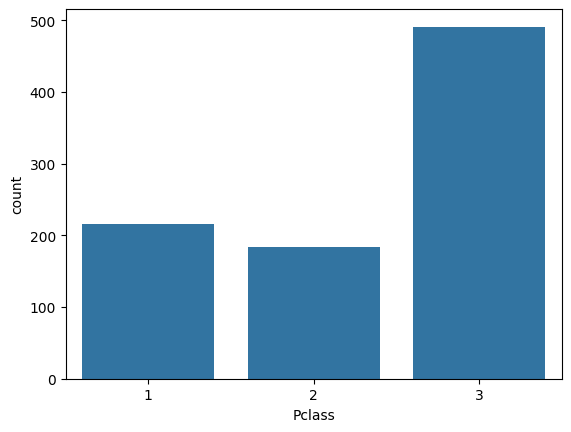

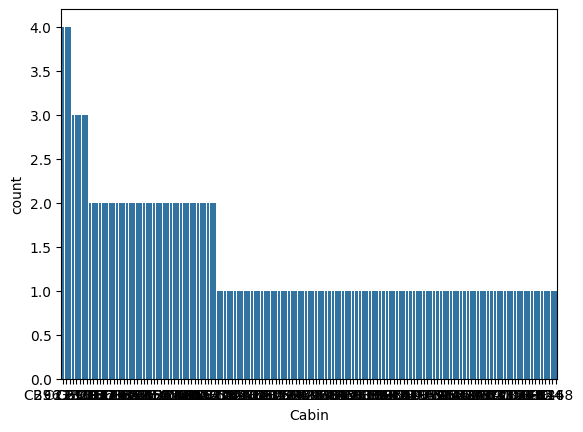

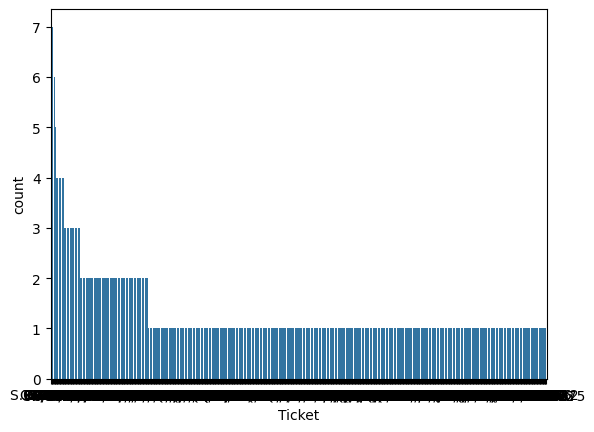

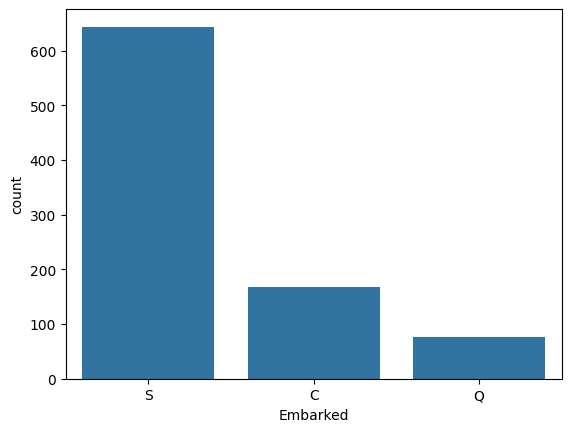

In [ ]:
for i in df_cat.columns:
    sns.barplot(x=df_cat[i].value_counts().index, y=df_cat[i].value_counts())
    plt.show()

# **Data Cleaning**

In [ ]:
train_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
train_df = train_df.drop(columns = ["PassengerId","Name","Cabin","Ticket"])

In [ ]:
train_df["Age"] = train_df["Age"].fillna(train_df["Age"].mean())

In [ ]:
train_df["Embarked"] = train_df["Embarked"].fillna(train_df["Embarked"].mode()[0])

In [ ]:
train_df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


# **Feature Engineering**

In [ ]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

encoded_data = encoder.fit_transform(train_df[['Sex', 'Embarked']])

encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Sex', 'Embarked']))

train_df = train_df.drop(['Sex', 'Embarked'], axis=1)
train_df = pd.concat([train_df, encoded_df], axis=1)


def classify(model):
    X = train_df.drop('Survived', axis=1)
    y = train_df['Survived']

    x_train, x_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=40
    )
    model.fit(x_train, y_train)
    print("Accuracy", model.score(x_test, y_test))

    score = cross_val_score(model, X, y, cv=5)
    print("CV SCORE :", np.mean(score))

model = DecisionTreeClassifier()
classify(model)

Accuracy 0.7713004484304933
CV SCORE : 0.767729583830268


Using Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
classify(model)

Accuracy 0.8251121076233184
CV SCORE : 0.8092398468394952


# **Data Processing**

In [ ]:
from sklearn.preprocessing import LabelEncoder
X_test = test_df.drop(columns=["PassengerId", "Name", "Cabin", "Ticket"], axis=1) # Changed 'test' to 'test_df'
X_test["Age"] = X_test["Age"].fillna(X_test["Age"].mean())
X_test["Fare"] = X_test["Fare"].fillna(X_test["Fare"].mean())

print(X_test.isnull().sum())

cols = ["Sex", "Embarked"]
le = LabelEncoder()

for col in cols:
    X_test[col] = le.fit_transform(X_test[col])

X_test.head()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


In [ ]:
X_test["Age"] = X_test["Age"].fillna(X_test["Age"].mean())
X_test["Fare"] = X_test["Fare"].fillna(X_test["Fare"].mean())

X_test.isnull().sum()

,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [ ]:
X_test = test_df.drop(columns=["PassengerId", "Name", "Cabin", "Ticket"], axis=1)

X_test["Age"] = X_test["Age"].fillna(X_test["Age"].mean())
X_test["Fare"] = X_test["Fare"].fillna(X_test["Fare"].mean())

X_test.isnull().sum()

from sklearn.preprocessing import LabelEncoder

cols = ["Sex", "Embarked"]
le = LabelEncoder()

for col in cols:
    X_test[col] = le.fit_transform(X_test[col])

X_test.head()
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.50000,0,0,7.8292,1
1,3,0,47.00000,1,0,7.0000,2
2,2,1,62.00000,0,0,9.6875,1
3,3,1,27.00000,0,0,8.6625,2
4,3,0,22.00000,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,2
414,1,0,39.00000,0,0,108.9000,0
415,3,1,38.50000,0,0,7.2500,2
416,3,1,30.27259,0,0,8.0500,2


# **Model Testing**

# **Test Model**

In [ ]:
X = train_df.drop(columns=["Survived"])
y = train_df["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)
categorical_columns = ['Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

pred = model.predict(X_test)
print(pred)

[0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1
 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1 0 1 1 1 0 1 1 1 0 0
 0 0 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0
 1 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 1 0
 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 1 1 1
 1]


In [ ]:
submit = pd.read_csv("/content/gender_submission.csv")
submit

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
submit["Survived"] = pred

submit

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
submit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [ ]:
submit.to_csv("Submission.csv", index=False)